In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import plot_is

In [3]:
from matplotlib.legend_handler import HandlerLine2D
from scipy import integrate
from mpl_toolkits.axes_grid1 import AxesGrid
import yt
from yt.mods import *

In [4]:
yt.funcs.mylog.setLevel(50)

# Following Foster and Chevalier's setup for $\xi_{max} = 6.451$, 

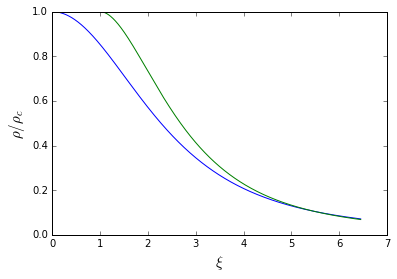

In [50]:
# timestep =1
# pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
# plt.figure()
# sp = pf.sphere(pf.domain_center, (0.30,"pc"))
# rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
# plt.plot(rp.x.value*3.24077929e-19,rp["density"].in_units("g/cm**3").value,label="Simulation")
rho_c = 0.02806
scale_d = 3.92e-18
xi_max = 6.451
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = rho_c*np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
#1cm = 3.24077929e-19 Parsecs
plt.plot(xi,rho/rho_c)
plt.xlabel(r"$\xi$",fontsize=15)
plt.ylabel(r"$\rho/\rho_c$",fontsize=15)
xi_max2 = 6.451
xi2 = np.arange(1, xi_max2, 0.01) #start at small poisitive number to avoid div-by-0
asol2 = integrate.odeint(solvr, [0, 0], xi2)
rho2 = rho_c*np.exp(-asol2[:,0]) #rho/rho_c
plt.plot(xi2,rho2/rho_c)

In [36]:
(rho_c/rho)[-1]

14.038055714059263

So actually their setup is a bit < 14.1 

This is weird, because if I start integrating later at xi =1 then it deviates from what it is supposed to look like 

In [46]:
xi_max=7
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = rho_c*np.exp(-asol[:,0]) #rho/rho_c
idx = np.where(rho_c/rho>14.1)[0][0]
print  xi[idx]

6.470001


We actually require xi_max = 6.47 for the condition > 14.1 to be satisfied 

But I am sticking with 6.471 just so that we can compare our results with Foster and Chevalier's simulation '

Moving this to ramses4/ because i want the old one to run for 5 free fall time until core formation (how do I tell when core forms? )  
Note that density.txt in ramses3 is already overwritten 

In [54]:
np.savetxt("../patch/hydro/isothermal_sphere/density.txt",rho/rho_c)

# Correctly setting external pressure and density profile 

In [10]:
cd /project/projectdirs/astro250/doris/ramses4/trunk/ramses/bin

/global/project/projectdirs/astro250/doris/ramses4/trunk/ramses/bin


In [55]:
dens_arr = np.loadtxt("../patch/hydro/isothermal_sphere/density.txt")

In [58]:
rho_c = 0.02806
scale_d = 3.92e-18
rho_min = min(dens_arr)*rho_c*scale_d
print rho_min

7.83550102952e-21


In [59]:
T_in = 10#K
k = 1.38e-16 #cgs
mp = 1.6726219e-24 #grams
scale_p =  2.51e-9 
P_out = (rho_min*k*T_in/mp)/scale_p 
print "Pressure at edge of cloud : ",P_out*scale_p , "cgs"
print "Pressure at edge of cloud: ", P_out , "code units"

Pressure at edge of cloud :  6.46469559004e-12 cgs
Pressure at edge of cloud:  0.00257557593229 code units


In [60]:
T_out = 1e7#K
rho_out = ((P_out*scale_p)*mp/k/T_out)/scale_d
print "Denisty outside the cloud: " , rho_out*scale_d,"cgs"
print "Denisty outside the cloud: ", rho_out , "code units"

Denisty outside the cloud:  7.83550102952e-27 cgs
Denisty outside the cloud:  1.99885230345e-09 code units


So I need to put these into the new condinit.f90 file which is specific to this setup, eventually I should incorporate this calculation into the fortran file so I don't have to manually input this '

Need to remember to change the size of array after changing density.txt

# Checking Pressure profile in cgs 


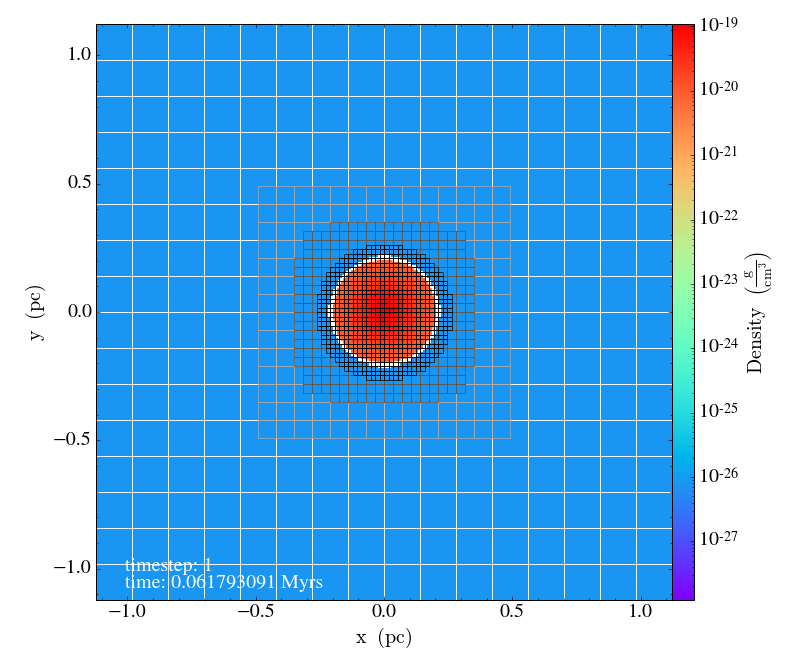


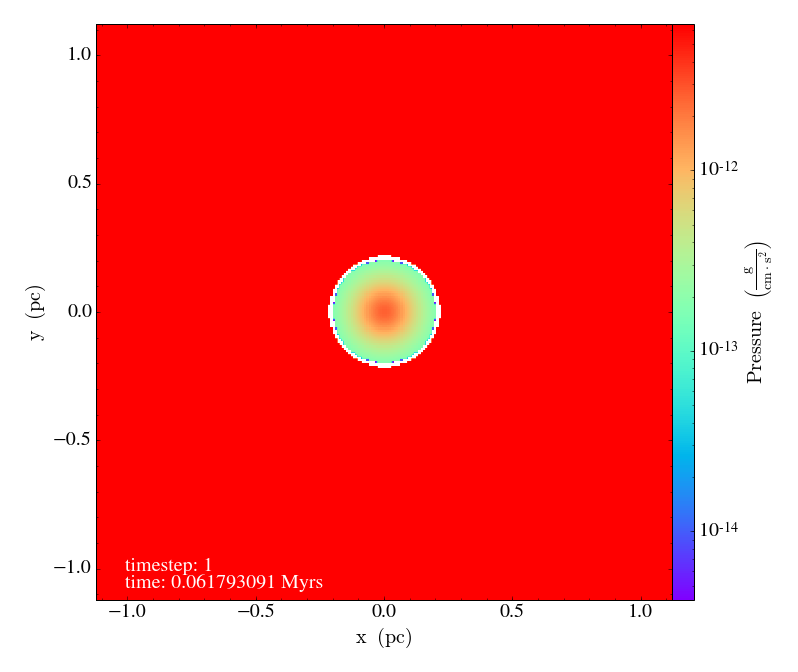


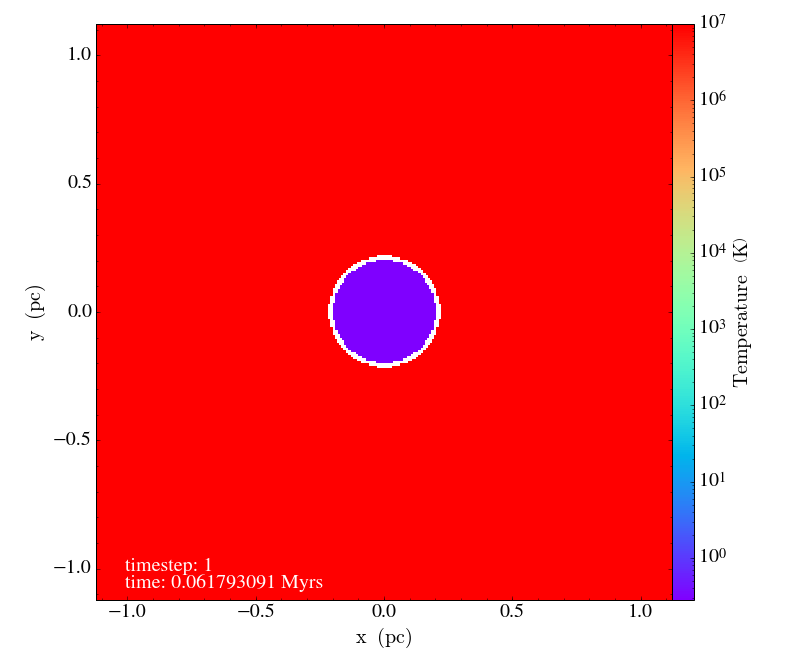

In [63]:
plot_is.plot_time_slice("density",1,grid=True)
plot_is.plot_time_slice("pressure",1)
plot_is.plot_time_slice("temperature",1)

# Results


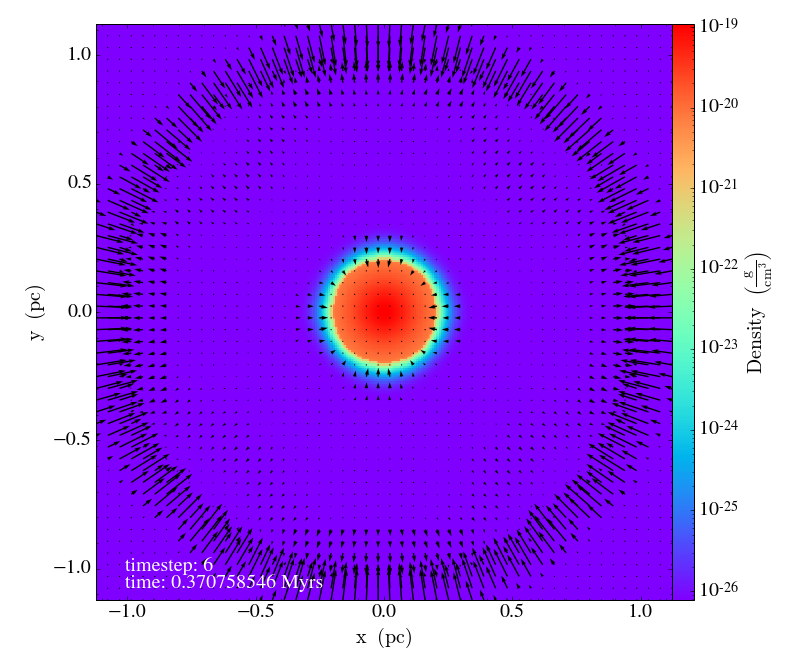

In [66]:
plot_is.plot_time_slice("density",6)     

### Oops, I forgot to adjust the xi_max in the initialization code so that's why there's the annulus of none initialized density values. 

Weird stuff going on here, accidentally setted up shock waves!

# Checking Pressure profile in cgs 


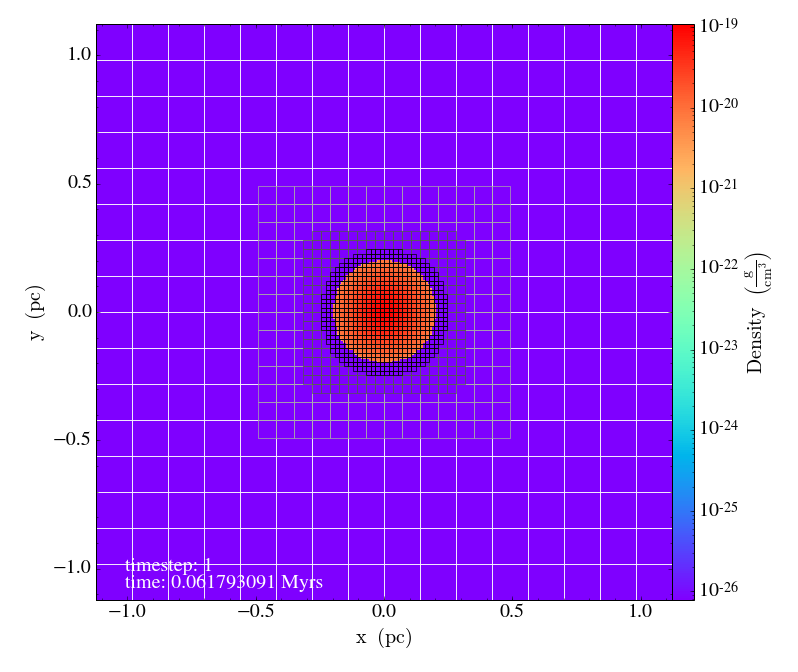


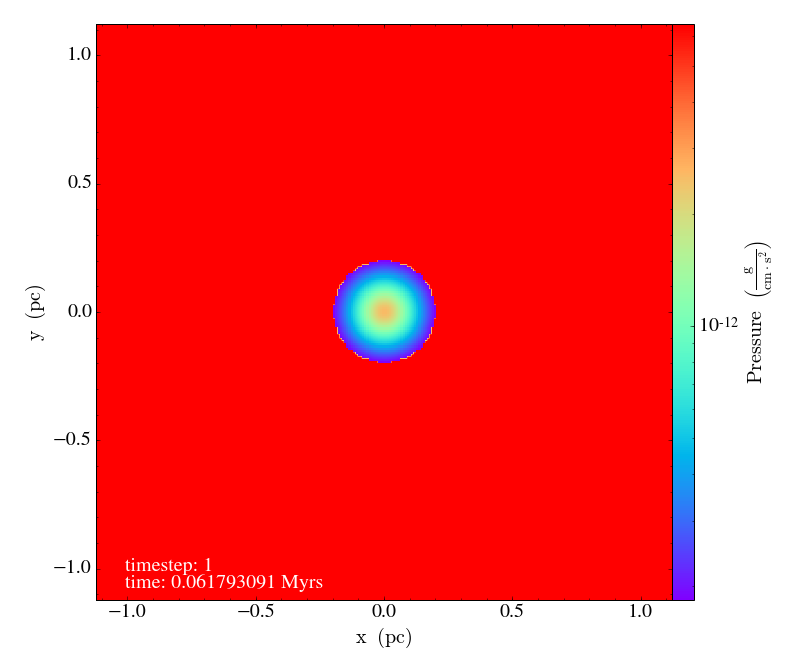


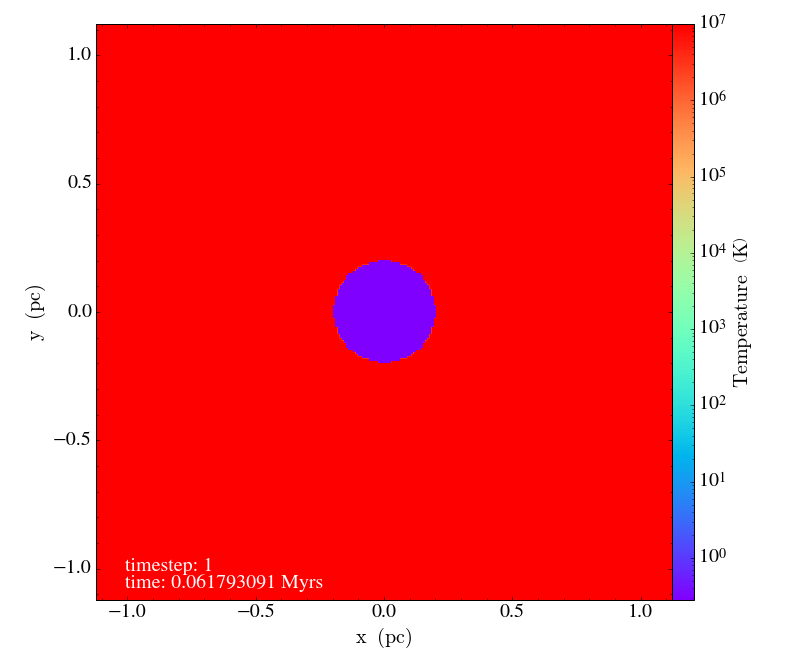

In [67]:
plot_is.plot_time_slice("density",1,grid=True)
plot_is.plot_time_slice("pressure",1)
plot_is.plot_time_slice("temperature",1)


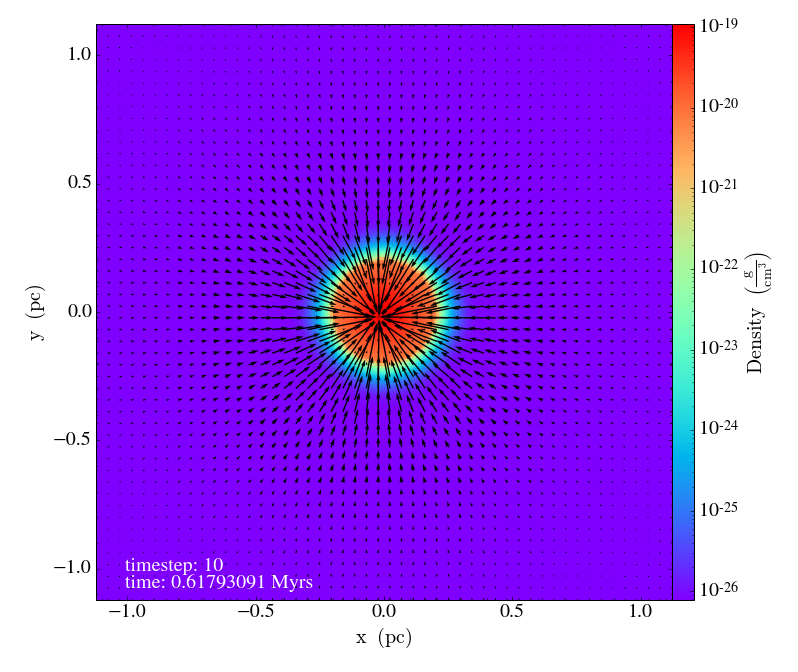

In [68]:
plot_is.plot_time_slice("density",10)     


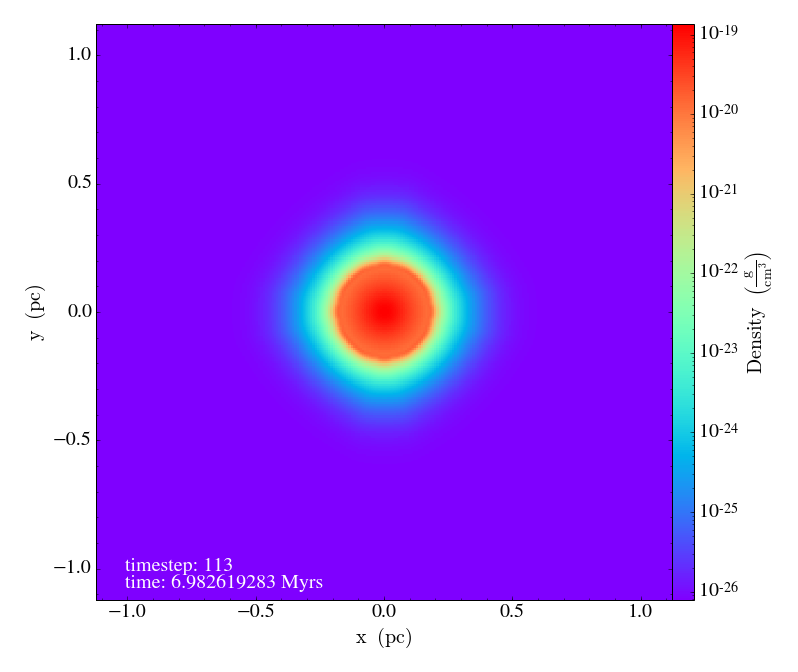

In [5]:
plot_is.plot_time_slice("density",113,velocity=False)     


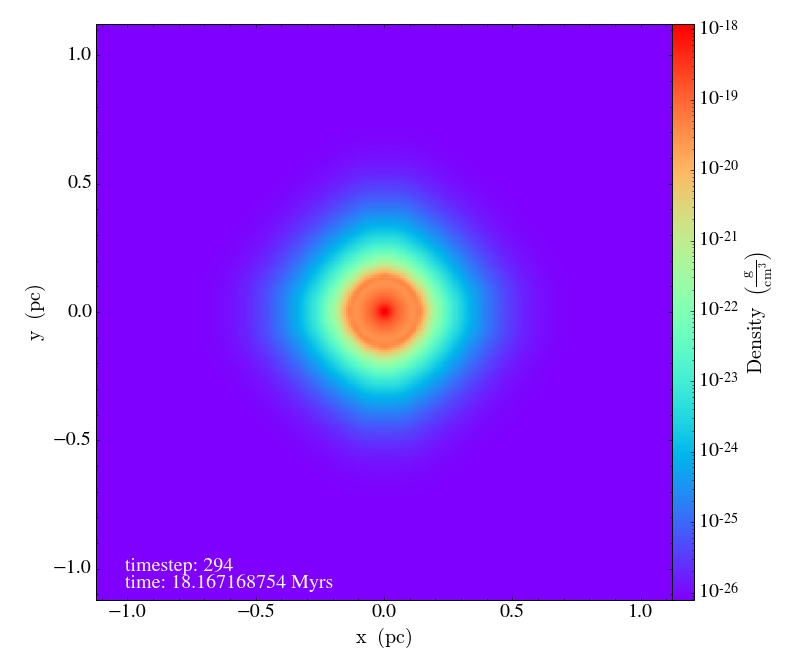

In [11]:
plot_is.plot_time_slice("density",294,velocity=False)     

# Turn off Self Gravity to make sure sphere is marginally stable (EQM config)

Testing this on ramses3/ 

In [5]:
cd /project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin/

/global/project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin



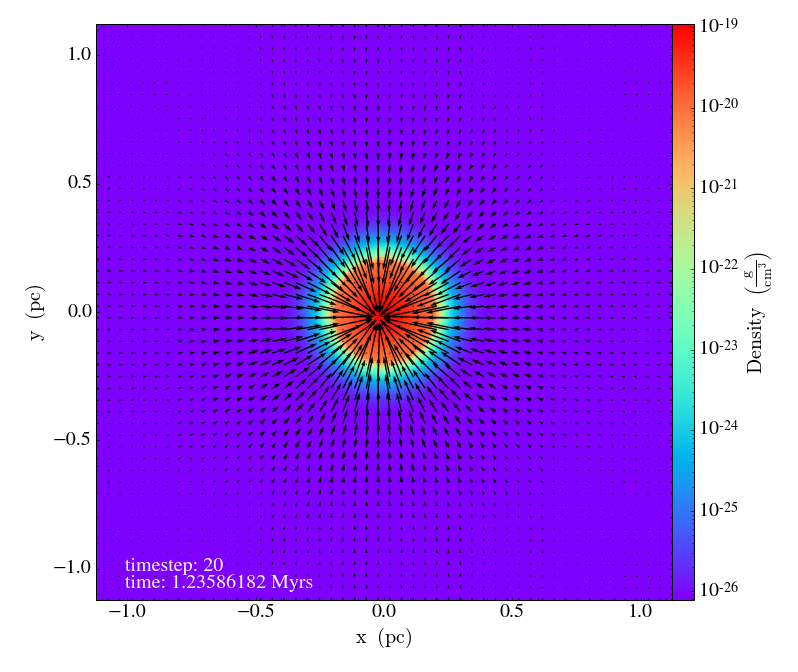

In [6]:
plot_is.plot_time_slice("density",20)


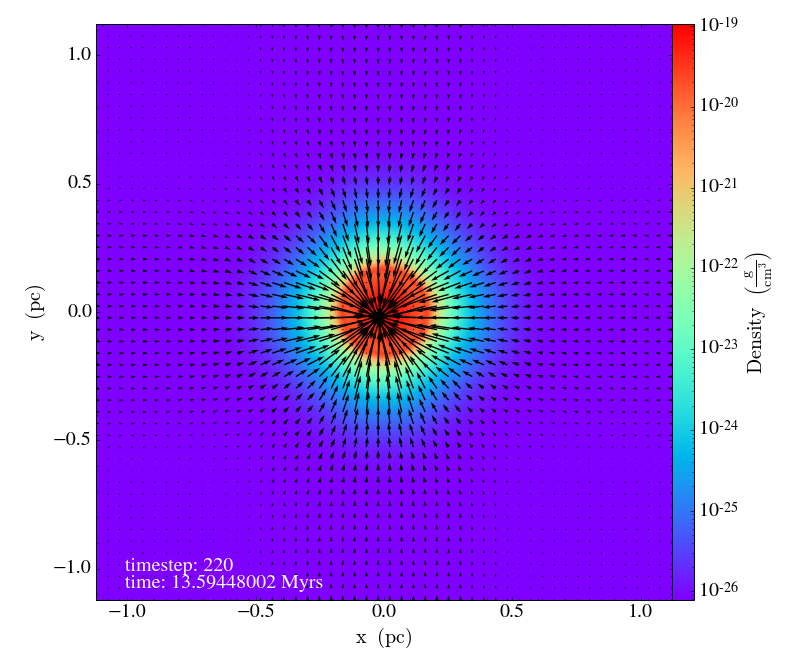

In [7]:
plot_is.plot_time_slice("density",220)

putting this inside /project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin/no_self_grav

Should not have this without self gravity, not too sure what's happening ...'

In [10]:
pwd

u'/global/project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin'


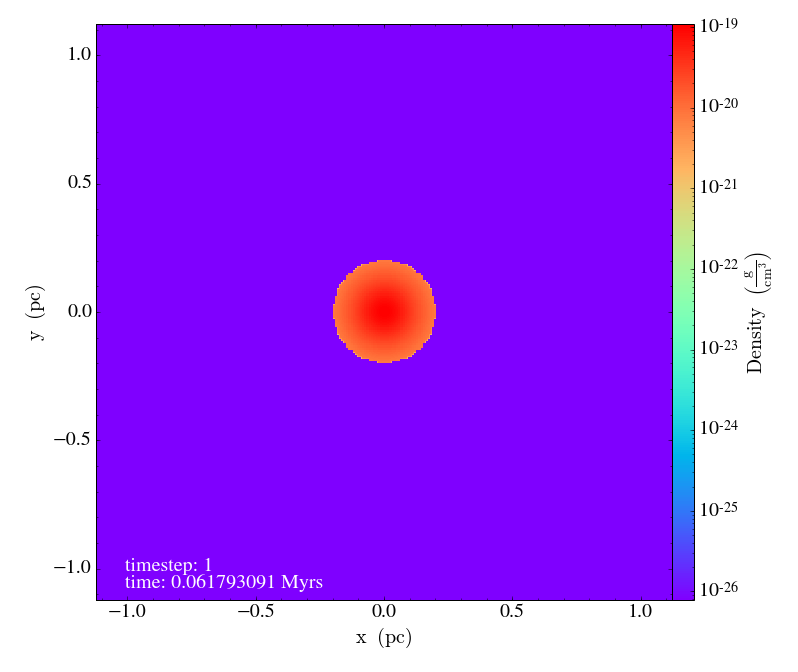

In [9]:
plot_is.plot_time_slice("density",1)


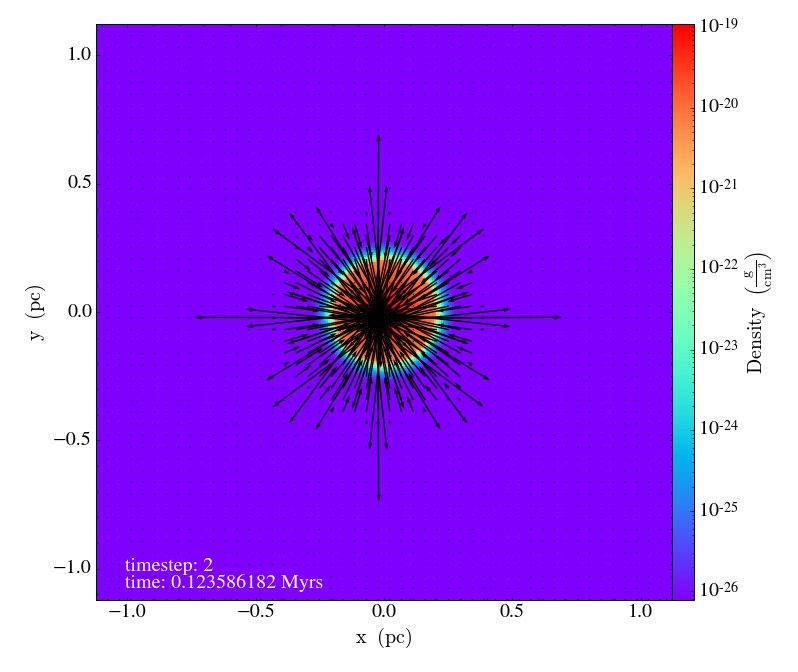

In [14]:
plot_is.plot_time_slice("density",2)


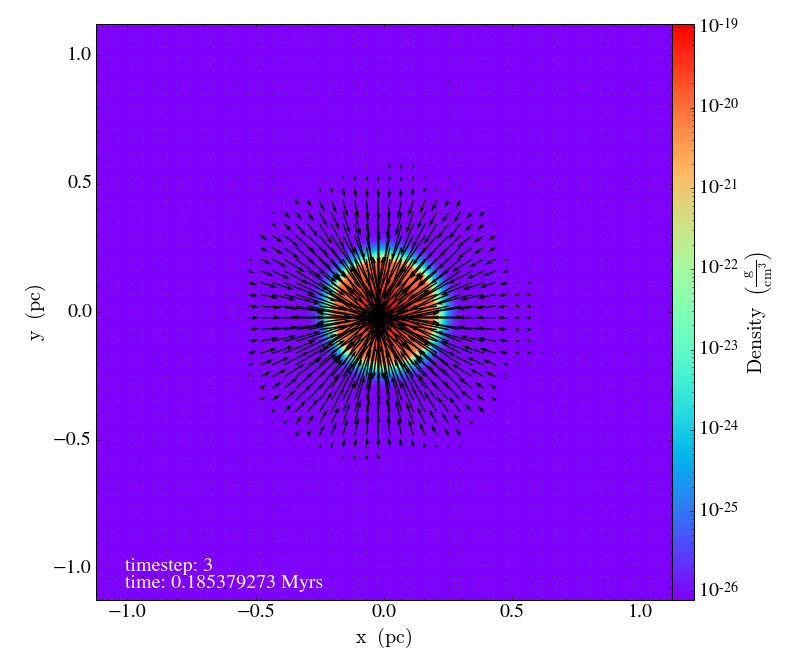

In [16]:
plot_is.plot_time_slice("density",3)

I think the cloud is struggling a lot to be in equilibrium 